# Feature Scaling
### a technique in which we standardize the independent features into a fixed range

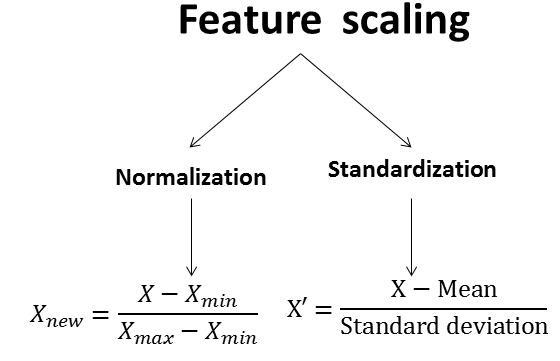

## 1. Standardization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.drop(['Purchased'],axis=1),df['Purchased'],test_size=0.2)
X_train.shape,X_test.shape

((320, 2), (80, 2))

### Standard Scaler

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
# stores the mean and standard deviation
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)
# using the formula and storing the values
# standard scaler returns a 2d numpy array

In [7]:
scaled_X_train, scaled_X_test

(array([[-0.63737106,  0.55236377],
        [ 0.42090542, -0.00255555],
        [-1.40702667, -1.22921932],
        [-0.25254325, -0.90795024],
        [-0.3487502 , -0.79112511],
        [ 0.80573322, -1.404457  ],
        [-0.25254325,  0.61077633],
        [-0.92599191, -0.44064975],
        [-1.69564753,  0.34791981],
        [-1.02219887,  0.55236377],
        [ 0.90194018, -0.61588743],
        [ 0.42090542, -0.17779323],
        [-0.06012935,  0.02665073],
        [-0.73357801,  0.55236377],
        [ 0.99814713, -1.08318792],
        [-1.21461277,  0.49395121],
        [ 0.03607761,  0.02665073],
        [ 0.90194018,  1.01966426],
        [-0.06012935,  0.05585701],
        [ 0.51711237,  1.22410822],
        [ 1.38297494,  1.28252078],
        [ 0.03607761, -0.55747487],
        [-0.25254325,  0.08506329],
        [ 0.99814713, -1.02477536],
        [-0.63737106,  1.3993459 ],
        [ 0.03607761,  1.2533145 ],
        [ 1.57538884, -0.00255555],
        [-0.63737106,  0.026

In [8]:
scaled_X_train=pd.DataFrame(scaled_X_train,columns=X_train.columns)
scaled_X_test=pd.DataFrame(scaled_X_test,columns=X_test.columns)

In [9]:
scaled_X_train

,Age,EstimatedSalary
0,-0.637371,0.552364
1,0.420905,-0.002556
2,-1.407027,-1.229219
3,-0.252543,-0.907950
4,-0.348750,-0.791125
...,...,...
315,-0.733578,-0.615887
316,0.709526,-1.404457
317,0.998147,0.756808
318,0.132285,-0.820331


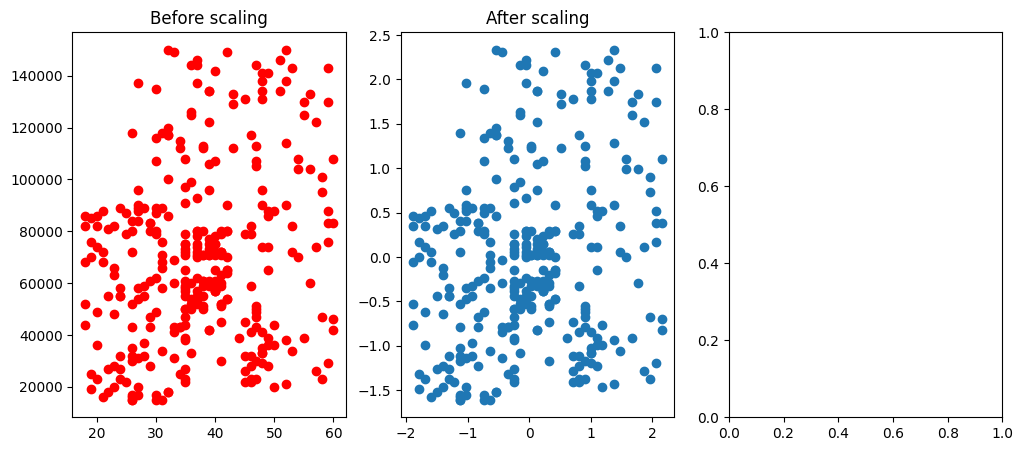

In [11]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'],color='r')
ax1.set_title('Before scaling')
ax2.scatter(scaled_X_train['Age'],scaled_X_train['EstimatedSalary'])
ax2.set_title('After scaling')
plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
le_unscaled = LogisticRegression()
le_scaled = LogisticRegression()
le_unscaled.fit(X_train,y_train)
le_scaled.fit(scaled_X_train,y_train)

LogisticRegression()

In [13]:
y_pred = le_unscaled.predict(X_test)
scaled_y_pred = le_scaled.predict(X_test)

In [14]:
print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,scaled_y_pred))

0.625
0.375


## 2. Normalization

a. min max<br>
the scaled values always lie between 0,1


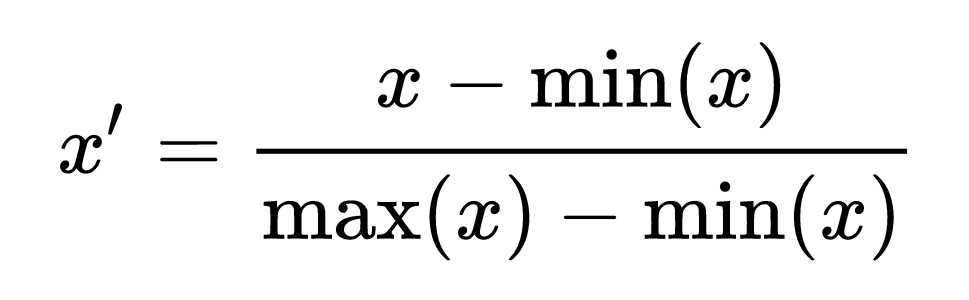

In [13]:
df = pd.read_csv('wine_data.csv')
df.rename(columns={'1':'Class label','14.23':'Alcohol','1.71':'Malic acid'},inplace=True)
df = df[['Class label','Alcohol','Malic acid']]
df.head()

,Class label,Alcohol,Malic acid
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76


C:\Users\Katta\AppData\Local\Temp\ipykernel_32488\3326648753.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Alcohol'],hist=False)


<Axes: xlabel='Alcohol', ylabel='Density'>

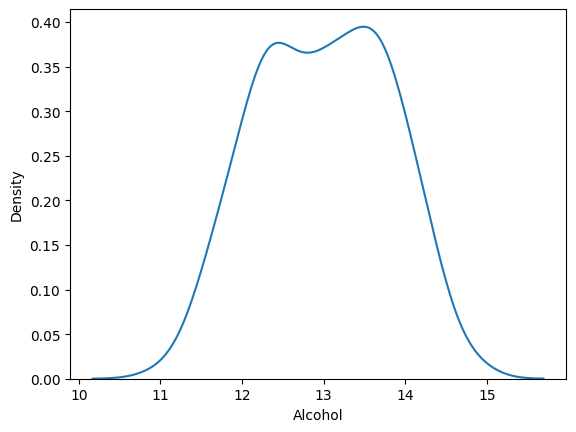

In [14]:
sns.distplot(df['Alcohol'],hist=False)

C:\Users\Katta\AppData\Local\Temp\ipykernel_32488\1682386118.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Malic acid' ],hist=False)


<Axes: xlabel='Malic acid', ylabel='Density'>

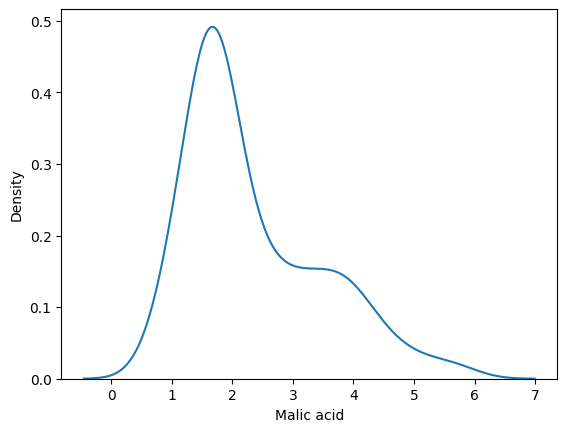

In [15]:
sns.distplot(df['Malic acid' ],hist=False)

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

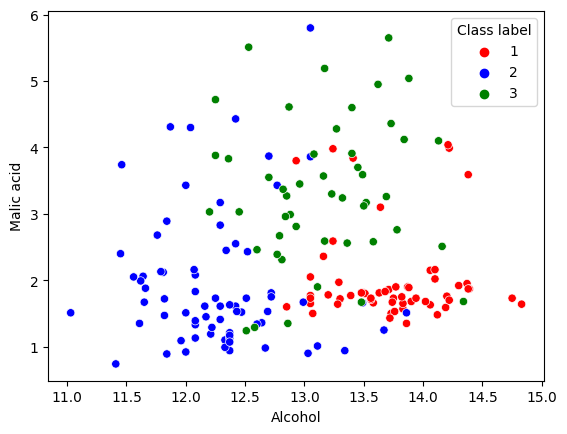

In [16]:
import matplotlib.pyplot as plt
sns.scatterplot(x=df['Alcohol'],y=df['Malic acid'],hue=df['Class label'],palette={1:'red',2:'blue',3:'green'})

In [17]:
from sklearn.preprocessing import MinMaxScaler
X_train,X_test,y_train,y_test = train_test_split(df.drop(['Class label'],axis=1),df['Class label'],test_size=0.2)

In [18]:
scaler = MinMaxScaler()
scaler.fit(X_train)
# stores the mean and standard deviation
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)
# using the formula and storing the values
# standard scaler returns a 2d numpy array

In [19]:
scaled_X_train=pd.DataFrame(scaled_X_train,columns=X_train.columns)
scaled_X_test=pd.DataFrame(scaled_X_test,columns=X_test.columns)


In [20]:
scaled_X_train

,Alcohol,Malic acid
0,0.439474,0.618577
1,0.407895,0.108696
2,0.560526,0.559289
3,0.478947,0.169960
4,0.342105,0.071146
...,...,...
136,0.710526,0.150198
137,0.352632,0.092885
138,0.563158,0.365613
139,0.515789,0.183794


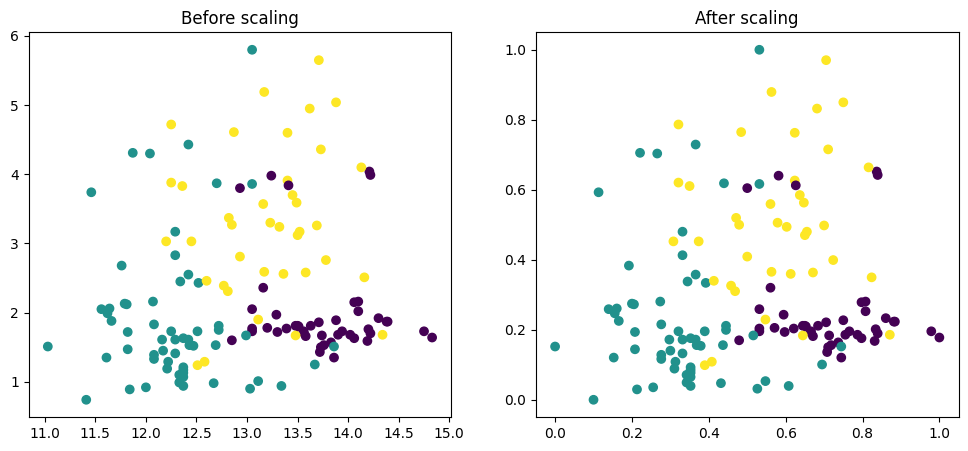

In [21]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Alcohol'],X_train['Malic acid'],c=y_train)
ax1.set_title('Before scaling')
ax2.scatter(scaled_X_train['Alcohol'],scaled_X_train['Malic acid'],c=y_train)
ax2.set_title('After scaling')
plt.show()

b. mean normalization<br>
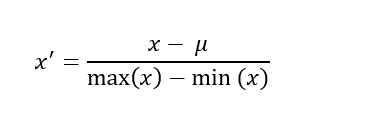

c. max absolute scaling<br>
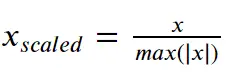<br>
MeanAbsScaler from sklearn.preprocessing

d. robust scaling<br>
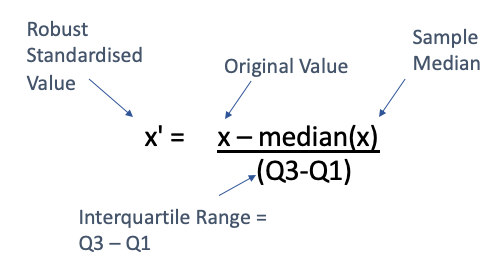<br>
MeanAbsScaler from sklearn.preprocessing

when you know min,max you must use minmax scaling.<br>
when there are outliers you must use robust scaling<br>
mostly use standard scaler